In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

dataTrain = pd.read_csv('Laptop.csv')

dataTrain.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040.0
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840.0
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940.0
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440.0
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940.0


In [3]:
type(dataTrain) 

pandas.core.frame.DataFrame

In [4]:
dataTrain.shape

(48, 11)

In [5]:
dataTrain = dataTrain.dropna()

In [6]:
dataTrain.shape

(27, 11)

In [7]:
dataTrain.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         0
RAM                   0
Hard_Disk_Capacity    0
OS                    0
Rating                0
Price                 0
dtype: int64

In [8]:
dataTrain.dtypes

Unnamed: 0              int64
Brand                  object
Model                  object
Series                 object
Processor              object
Processor_Gen          object
RAM                   float64
Hard_Disk_Capacity     object
OS                     object
Rating                float64
Price                 float64
dtype: object

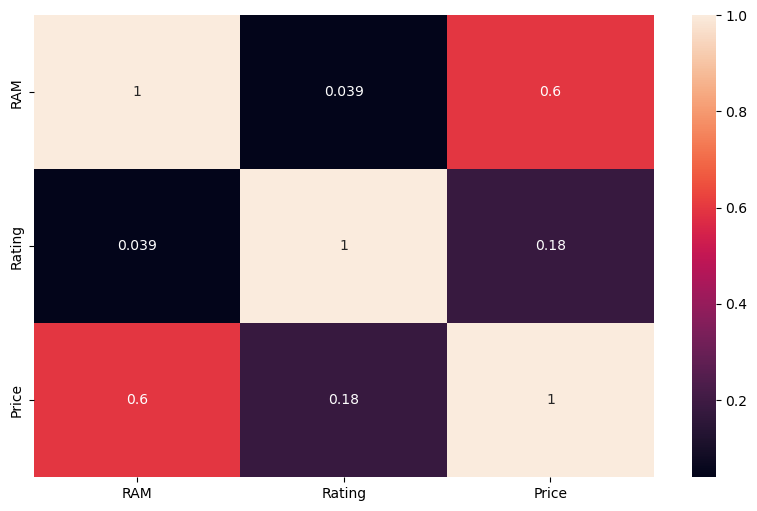

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
dtype_df = dataTrain.dtypes
float_cols = dtype_df.index[dtype_df == 'float64']
corr = dataTrain[float_cols].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
 dataTrain.describe() 

,Unnamed: 0,RAM,Rating,Price
count,27.000000,27.000000,27.000000,27.000000
mean,22.000000,8.000000,4.296296,44907.000000
std,12.803245,2.717465,0.145395,8914.525049
min,2.000000,4.000000,4.100000,33940.000000
25%,12.500000,8.000000,4.200000,37640.000000
50%,22.000000,8.000000,4.300000,40940.000000
75%,29.500000,8.000000,4.300000,52940.000000
max,46.000000,16.000000,4.800000,59940.000000


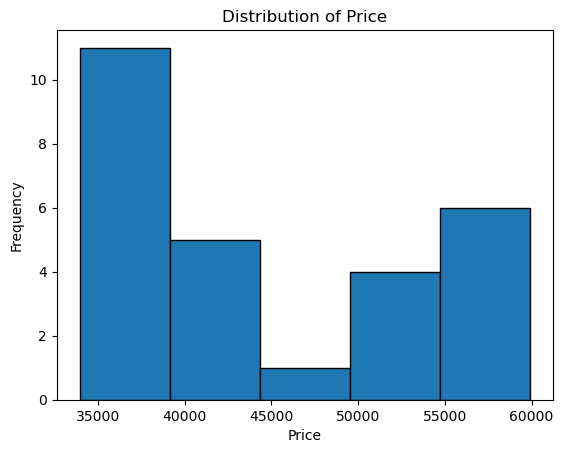

In [11]:
import matplotlib.pyplot as plt

dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [12]:
dataTrain.describe(include = 'object') #summary statistics for categorical values

,Brand,Model,Series,Processor,Processor_Gen,Hard_Disk_Capacity,OS
count,27,27,27,27,27,27,27
unique,5,11,10,11,5,3,4
top,ASUS,VivoBook,3,i3,-,512 GB SSD,Windows 11 Home
freq,10,7,9,10,9,13,14


<Axes: xlabel='Rating', ylabel='Price'>

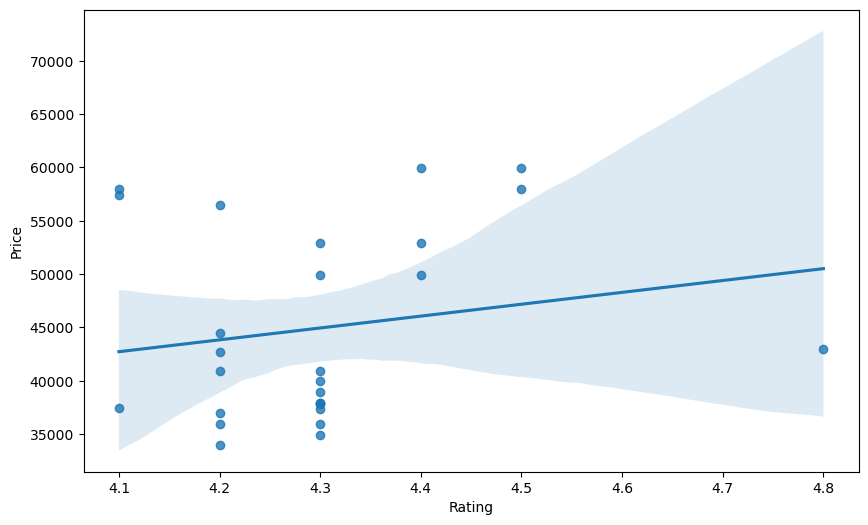

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Rating", y="Price", data=dataTrain)

In [14]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Rating'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.18148190216405422  with a P-value of P = 0.3649670925588018


<Axes: xlabel='RAM', ylabel='Price'>

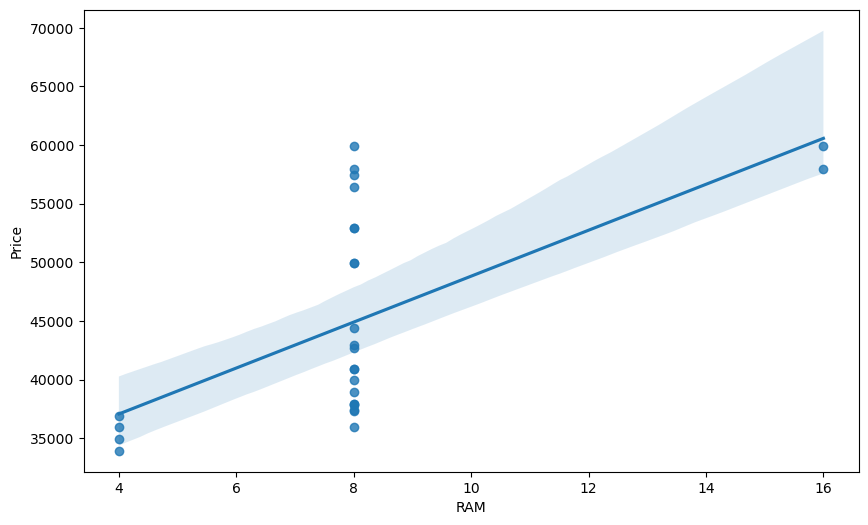

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(x="RAM", y="Price", data=dataTrain)

<Axes: xlabel='Processor_Gen', ylabel='Price'>

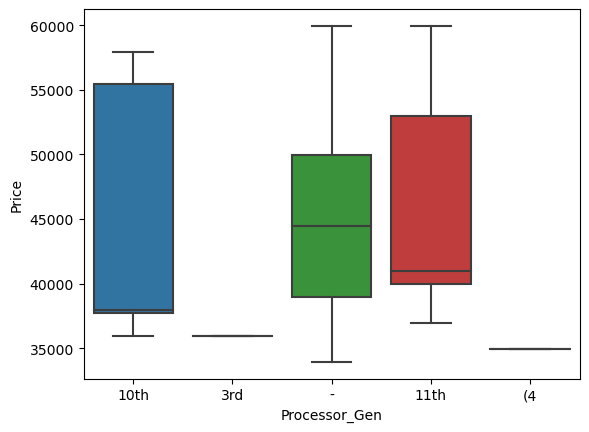

In [16]:
sns.boxplot(x="Processor_Gen", y="Price", data=dataTrain)

In [17]:
dataTrain.drop(['Series','OS'], axis = 1, inplace = True)

In [18]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Brand = labelencoder.fit_transform(dataTrain.Brand)
dataTrain.Model = labelencoder.fit_transform(dataTrain.Model)
dataTrain.Processor = labelencoder.fit_transform(dataTrain.Processor)
dataTrain.RAM = labelencoder.fit_transform(dataTrain.RAM)

dataTrain.Processor_Gen = labelencoder.fit_transform(dataTrain.Processor_Gen)
dataTrain.Hard_Disk_Capacity = labelencoder.fit_transform(dataTrain.Hard_Disk_Capacity)
dataTrain.Rating = labelencoder.fit_transform(dataTrain.Rating)
dataTrain.Price = labelencoder.fit_transform(dataTrain.Price)

In [19]:
dataTrain.head(10)

,Unnamed: 0,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price
2,2,0,8,8,2,1,2,2,7
4,4,0,6,9,2,1,2,4,18
5,5,0,5,2,4,1,1,2,2
6,6,1,3,1,1,0,1,1,0
8,8,3,1,8,2,1,0,0,5
11,11,3,1,8,3,1,1,1,10
12,12,3,1,8,2,1,1,2,7
13,13,1,3,2,1,1,1,2,4
14,14,2,5,2,1,1,1,2,8
15,15,3,1,8,3,1,1,2,10


In [20]:
x_train=dataTrain.iloc[:,0:10]
y_train=dataTrain.iloc[:,8]

In [21]:
x_train.head()

,Unnamed: 0,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price
2,2,0,8,8,2,1,2,2,7
4,4,0,6,9,2,1,2,4,18
5,5,0,5,2,4,1,1,2,2
6,6,1,3,1,1,0,1,1,0
8,8,3,1,8,2,1,0,0,5


In [22]:
y_train.head()

2     7
4    18
5     2
6     0
8     5
Name: Price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.43, random_state = 40)

In [24]:

x_train=dataTrain.iloc[:,0:12]
y_train=dataTrain.iloc[:,6]


In [25]:
x_train.shape

(27, 9)

In [26]:
x_test.shape

(12, 9)

In [27]:
y_train.shape

(27,)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [29]:
y_test.shape

(12,)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [31]:
y_pred1 = model_mlr.predict(x_test)

In [32]:
y_test.iloc[2]

9

In [33]:
y_pred1[2]

1.0000000000000002

In [34]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  87.41666666666667


In [35]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  7.25


In [36]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [37]:
y_pred2 = model_rf.predict(x_test)

In [38]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  87.23905833333333


In [39]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  7.230833333333333


In [40]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [41]:
y_pred3 = model_lm.predict(x_test)

In [42]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  7.275607257828504


In [43]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  88.9724325843873


In [44]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
         ]

In [45]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,7.250000
1,Random Forest,7.230833


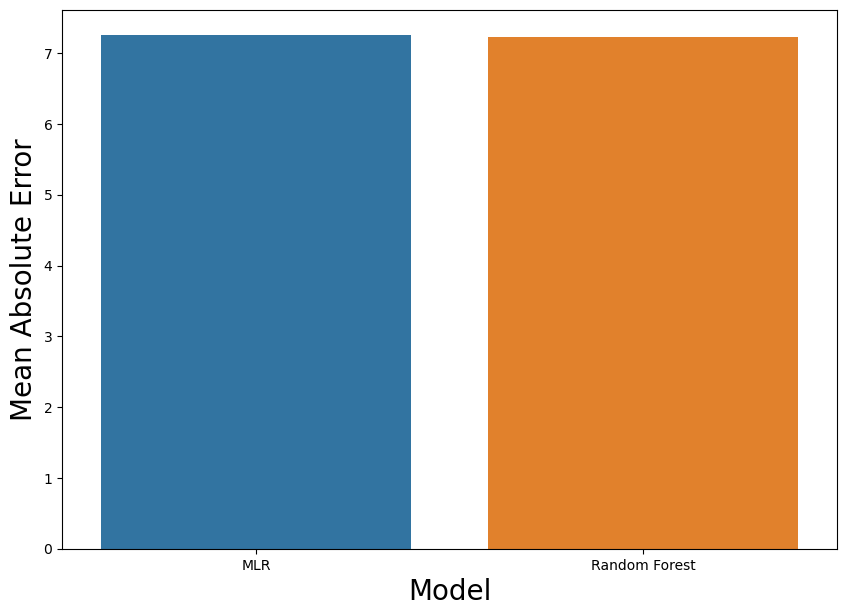

In [46]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()